**Project Assignment**

**Formalities**

This is the project for the course Probability and Statistical Learning Using Python, 2023. Here, you are asked to carry out the analysis using the tools, techniques, and skills acquired in the course and hand in a .pynb file with the solutions.

The **deadline  is Friday, October
27, 2023.** You should upload the solution file to 'Project Assignment' in Canvas via 'Home-->Project Assignment'.
Note that this is an individual exam.

**Part I**

In this exercise we will estimate the test error of logistic regression model using the below described validation set approach. You will neeed to import the *Default.csv* file provided. 

In [100]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import patsy
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [101]:
np.random.seed(1)
#Uncomment and set the path to the csv file below
df = pd.read_csv("Default.csv", index_col=0)

In [102]:

print(df.head(100))


    default student      balance       income
1        No      No   729.526495  44361.62507
2        No     Yes   817.180407  12106.13470
3        No      No  1073.549164  31767.13895
4        No      No   529.250605  35704.49394
5        No      No   785.655883  38463.49588
..      ...     ...          ...          ...
96       No      No   820.017113  51584.65732
97       No     Yes   619.751869  15750.62208
98       No      No  1047.718124  46416.97099
99       No      No   243.841328  47193.88813
100      No      No   186.500387  45430.55027

[100 rows x 4 columns]


(a) Fit a logistic regression model that uses $income$ and $balance$ to
predict $default$ and print out the summary. **(3 pts)**

In [103]:
np.random.seed(1)

# Load the data
df = pd.read_csv('Default.csv')

# Map the file
df['default'] = df['default'].map({'No': 0, 'Yes': 1})
df['student'] = df['student'].map({'No': 0, 'Yes': 1})

# Define X and Y
X = df[['income', 'balance']]
y = df['default']

# Create training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# logistic regression model
logit = LogisticRegression()
logit.fit(X_train, y_train)

# Prediction step
y_pred = logit.predict(X_test)


model_summary = smf.logit('default ~ income + balance', data=df).fit().summary()
print("Model Summary:")
print(model_summary)


accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy
print('Accuracy:', accuracy)
print('Test Error:', test_error)

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
Model Summary:
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 27 Oct 2023   Pseudo R-squ.:                  0.4594
Time:                        21:35:19   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2

(b) You are supposed to estimate the test error of this model using the validation set approach described below. In order to do this, you must perform the following steps: **(4 pts)**

i. Split the sample set into a training set and a validation set.

In [104]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

ii. Fit a multiple logistic regression model using only the training
observations.

In [105]:
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

iii. Obtain a prediction of default status for each individual in
the validation set (test set) by computing the posterior probability of
$default$ for that individual, and classifying the individual to
the $default$ category if the posterior probability is greater
than 0.5.

In [106]:
y_prediction= logit_model.predict(X_val)

iv. Compute the validation set error, which is the fraction of
the observations in the validation set (test set) that are misclassified.

In [107]:

validation_accuracy = accuracy_score(y_val, y_prediction,)
print('Validation Set Accuracy:', validation_accuracy)

Validation Set Accuracy: 0.9671428571428572


(c) Now consider a logistic regression model that predicts the probability of default using $income$, $balance$, a dummy variable for $student$ and print the summary. Estimate the test error for this model using the validation
set approach. Comment on the results. Does the inclusion of a dummy variable for student lead to a reduction in the test error? **(3 pts)**

In [118]:
X = df[['income']]
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print("Test Error: ", 1 - accuracy_score(y_test, y_pred))
logit_summary = smf.logit('default ~ income + balance + student', data=df).fit().summary()
print("Summary: ", logit_summary)


Accuracy:  0.9663333333333334
Test Error:  0.03366666666666662
Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
Summary:                             Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 27 Oct 2023   Pseudo R-squ.:                  0.4619
Time:                        21:38:58   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492  

**Part II**

In [120]:
import numpy as np
import pandas as pd
from math import sqrt
import random
from matplotlib import pyplot as plt
import warnings

In this exercise, you will demonstrate your understanding of the KNN classification algorithm and test it on a breast cancer dataset. The algorithm should be implemented in pure python, without using the sklearn library.

**KNN algorithm**

(a)  Implement a function of your own to perform KNN classification **without using the default available libraries such as KNeighborsClassifier() in sklearn**. You will need to consider the Euclidean distances between the features and data to be predicted (test data) when selecting the k-nearest neighbors. The function should take 3 inputs as 1) data set to train the model 2) data to test 3) number of neighbours (k). If *k* is set to a value less than or equal to the total classification groups, the function should give a warning, and  warn() function defined in the 'warning' module will be useful for that.

The function should output *classification_result*, where *classification_result* is the result of your classifier. Further, you should provide a suitable measure of the confidence on the classification. Justify your choice. 

Please note that only a few basic libraries/modules are imported and thus you are expected to import the needed others. 



**Hint:** You may fill and complete the function given below.                **(5 pts)** 

In [121]:

def knn_algorithm(train_data, test_data, k_neighbors=5):
    num_classes = len(np.unique(train_data[:, -1]))

    if k_neighbors >= len(train_data):
        warnings.warn("k is greater than or equal to the number of data points in the training set. Consider choosing a smaller k.")
        k_neighbors = len(train_data) - 1

    classification_result = np.zeros(len(test_data), dtype=int)
    confidence = np.zeros(len(test_data), dtype=float)

    for i, test_instance in enumerate(test_data):
        distances = np.sqrt(np.sum((train_data[:, :-1] - test_instance) ** 2, axis=1))
        sorted_indices = np.argsort(distances)
        k_indices = sorted_indices[:k_neighbors]
        k_nearest_labels = train_data[k_indices, -1]

        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        most_common_label = unique_labels[np.argmax(counts)]

        classification_result[i] = most_common_label
        confidence[i] = counts.max() / k_neighbors

    return classification_result, confidence

#### Now let's test the implemented KNN algorithm on the given breast cancer dataset.

This dataset contains records of breast cancer patients. Here we will use the features (columns) to predict the correct cancer class (last column) for the patients in the dataset as shown below. 

In [122]:
columns = ['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion',
           'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli', 'mitoses', 'class']
#Import the data file by uncommenting below and setting the path to the dataset
df = pd.read_csv('breast-cancer-wisconsin.data', header=None, names=columns)
df.head(699)

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


#### Explore the data

(b) Check how many different cancer classes are available, and plot a pie chart to see the distribution of classes. Then, find and replace all the missing values with the mode of the particular column(s). Note that the missing values are marked with '?' in the dataset. **(1 pt)** 

amount of classes 2


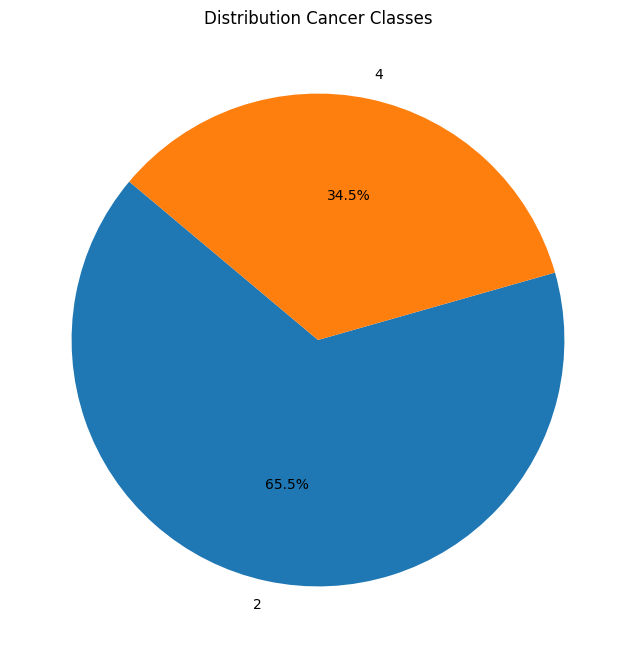

In [141]:
class_counts = df['class'].value_counts()
print("amount of classes", num_classes)



plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution Cancer Classes")
plt.show()


df = df.replace('?', pd.NA)
df = df.fillna(df.mode().iloc[0])

#### Feature engineering

(c) Drop the obiviously unwanted column(s). **(1 pt)**

In [94]:
 #use df drop to drop column id since its unwanted 
df = df.drop("id",axis=1)
(df.head(699))

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


#### Split the training and test data

(d) In here, you will split the data into training and test sets, **without using sklearn library.** Please use 20% of the dataset as test set and the rest for train set. Shuffle the data prior to splitting in order to prevent any bias during the training and to avoid the model from learning the order of the training. **(5 pts)**

In [126]:
df = pd.read_csv('breast-cancer-wisconsin.data', header=None, names=columns)
df = df.sample(frac=1, random_state=42)
test_size = int(0.2 * len(df))

# Split the data into training and test sets
train_data = df.iloc[test_size:]  # 80% for training
test_data = df.iloc[:test_size]   # 20% for testing

#### Predict the class for test data and calculate the accuracy

(e) Now train the KNN classifier you developed in (a) using the training set, and test it on the test set with *k_neighbours=5*. **(4 pts)**

Print the confidence for the incorrect predictions the classifier has made.

Find the accuracy of the predictions.

In [157]:
# Assuming you've already defined the knn_algorithm function and have train_data and test_data

# create KNN model and output the prediction and confidence
classification_result, confidence = knn_algorithm(train_data, test_data, k_neighbors=5)




InvalidIndexError: (slice(None, None, None), -1)

**Effect of reduction in training data size on confidence of predictions**

(f) Now increase the test set size to 40% of the dataset while keeping the same *k_neighbours* and print the confidence and accuracy of the predictions similar to the previous question. Explain the results in comparison with (e) **(2 pts)**

In [149]:
# Split the data into features (X) and labels (y)
X_train = train_set.iloc[:, 1:-1].values  # Features for training
y_train = train_set.iloc[:, -1].values    # Labels for training
X_test = test_set.iloc[:, 1:-1].values    # Features for testing
y_test = test_set.iloc[:, -1].values      # True labels for testing

k_neighbours = 5

# Initialize lists to store incorrect predictions and their corresponding confidences
incorrect_predictions = []
incorrect_confidences = []

# Iterate through the test set
for i in range(len(X_test)):
    test_instance = X_test[i]      # Features of the test instance
    true_label = y_test[i]         # True class label
    
    # Use the KNN classifier to make a prediction
    predicted_label, confidence = knn_algorithm(X_train, test_instance, k_neighbours)
    
    # Check if the prediction is incorrect
    if predicted_label != true_label:
        incorrect_predictions.append(i)
        incorrect_confidences.append(confidence)

# Print the confidence for the incorrect predictions
print("Confidence for incorrect predictions:")
for i, confidence in zip(incorrect_predictions, incorrect_confidences):
    print(f"Sample {i+1}: Confidence = {confidence:.2f}")

# Calculate and print the accuracy of the predictions
accuracy = 1 - (len(incorrect_predictions) / len(X_test))
print("\nAccuracy:", accuracy)

TypeError: 'int' object is not subscriptable

#### Alternative classification methods


(g) Propose alternative classification approaches for this problem and discuss the advantages and disadvantages with respect to KNNs (you don't need to implement them). **(2 pts)**

Decision Trees:
Pros:
Interpretability: Decision trees are easy to understand and explain which is good for making quick judgement calls.
Feature Selection: Decision trees naturally select important features, helping identify key variables in the dataset.

Cons:
Overfitting: Decision trees tend to overfit, leading to poor generalization on unseen data. This requires techniques like pruning to mitigate.
Instability: Small variations in the training data can result in significantly different decision trees, making them unstable models.
k-Nearest Neighbors (k-NN):
Pros:
Simplicity: k-NN is simple to implement and understand, making it a quick choice for baseline models.
Robustness: k-NN can perform well in the presence of noisy data, outliers, or irrelevant features.
Cons:
Computational Cost: k-NN can be computationally expensive, especially with large datasets, as it requires calculating distances for each prediction.
Sensitivity to k: The choice of the hyperparameter k (number of neighbors) significantly impacts results, and selecting the right k can be challenging.